#  Assessment of customer satisfaction of bus services in Tirana ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

### Key Variables and Their Importance
#### With these column names we refer to their edited names that we will see in the following steps.

Timestamp (timestamp): Records the exact date and time of the survey response.

Interview Time (1_koha_e_intervistimit): Indicates the time period during which the interview was conducted.

Bus Station (2_stacioni_i_urbanit_ku_po_behet_intervistimi): Specifies the bus station where the survey took place.

Bus Line (3_linja_e_monitoruar): Identifies the monitored bus line.

Trip Purpose (4_a_qëllimi_i_udhëtimit_sot): Describes the reason for the respondent's trip (e.g., work, shopping, leisure).

Main Trip Purpose (4_b_qëllimi_kryesor_i_udhëtimit_sot): Specifies the primary reason for the trip.

Ticket Type (5_info_lidhur_me_llojin_e_biletes): Indicates whether the respondent used a monthly pass, single-use ticket, or free travel.

Alternative Transport (6_mundësia_e_perdorimit_të_makinës_për_udhëtimin): Identifies if the respondent had the option to use a car for this trip.

General Satisfaction (7_kënaqësia_e_përgjithshme): Measures overall bus service satisfaction on a scale of 0-10.

Bus Stop Satisfaction (8_kënaqësia_me_stacionet): Rates the overall satisfaction with bus stops.

Bus Stop Cleanliness (8_1_pastrimi_dhe_gjendja_e_stacionit_te_autobuzit): Assesses how clean and well-maintained bus stops are.

Bus Stop Information (8_2_informacioni_i_stacionit_te_autobuzit): Evaluates the availability and clarity of information at bus stops.

Bus Stop Crowding (8_3_popullimi_i_stacionit_te_autobuzit): Measures how crowded the bus stops are.

Personal Safety at Bus Stops (8_4_siguria_personale_në_stacionin_e_autobuzit): Assesses the sense of safety while waiting at bus stops.

Average Waiting Time (8_5_koha_mesatare_e_pritjes): Measures the typical waiting time for a bus.

Bus Cleanliness (9_1_pastërtia_e_autobusit): Rates the cleanliness inside the bus.

Information Inside the Bus (9_2_informacione_brenda_autobusit): Evaluates the availability of route and stop information inside the bus.

Bus Crowdedness (9_3_popullimi_në_autobus): Evaluates how packed buses are during travel.

Temperature Inside the Bus (9_4_temperatura_brenda_autobusit): Assesses the comfort level of the bus temperature.

Bus Condition (9_5_gjendja_e_autobusit): Measures the physical condition and maintenance of the bus.

Bus Travel Time (9_6_koha_e_udhetimit): Evaluates the journey duration compared to expectations.

Personal Safety Inside the Bus (9_7_siguria_personale): Assesses perceived safety inside the bus.

Driver Helpfulness (9_8_ndihma_e_shoferit): Rates the politeness and assistance of drivers and conductors.

Value for Money (9_9_vlera_për_paratë): Measures whether passengers feel they receive good service for the cost.

Gender (10_gjinia_): Records the gender of the respondent.

Age Group (11_grupmosha_): Categorizes respondents into different age brackets.

In [1]:
# Step 0: Importing the main libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

### PART 1: CUSTOMER SATISFACTION ANALYSIS & MODELING
#### =====================================================================================================================================
#### This section analyzes the dataset and models the impact of different factors on overall customer satisfaction with public transport.
#### =====================================================================================================================================


#####  Load the Dataset

In [3]:
df = pd.read_csv("css.csv")


In [4]:
# Display first few rows to understand structure

from IPython.display import display

# Assuming 'df' is your DataFrame
display(df.head())


,Timestamp,1.Koha e intervistimit:,2. Stacioni i urbanit ku po behet intervistimi,3. Linja e monitoruar,4. a. Cili është/ishte qëllimi i këtij udhëtimi sot?,4.b. Cili është/ishte qëllimi kryesor i këtij udhëtimi sot?,5. Më nevojitet një informacion në lidhje me llojin e biletës që po përdorni specifikisht për këtë udhëtim.,6. Could you have used a car for this trip?,7. General satisfaction,8. General satisfaction bus stops,...,9.2. Information inside the bus,9.3. Bus crowdedness,9.4. Temperature inside the bus,9.5. Bus state of repair,9.6. Bus travel time,9.7. Personal safety inside the bus,9.8. Driver and conductor helpfulness,9.9. Value for money,10. Gjinia:,11. Grupmosha:
0,10/07/2022 06:44,6:30-9:30,1: 15 Kateshi,1,Punë,Punë,Abone mujore,Po,2,6,...,3,2,3,3,2,3,5,4,Vajzë/Grua,19-60 vjeҫ
1,10/07/2022 06:54,6:30-9:30,1: 15 Kateshi,1,Punë,Punë,Abone mujore,Jo,3,3,...,1,1,1,2,1,2,2,2,Vajzë/Grua,19-60 vjeҫ
2,10/07/2022 07:19,6:30-9:30,2: 9 kateshet,12,Punë,Punë,Abone mujore,Jo,7,1,...,2,0,0,3,6,0,0,3,Djalë/Burrë,19-60 vjeҫ
3,10/07/2022 07:26,6:30-9:30,1: 15 Kateshi,1,Punë,Punë,Abone mujore,Po,2,2,...,0,0,0,1,1,2,3,1,Vajzë/Grua,19-60 vjeҫ
4,10/07/2022 07:30,6:30-9:30,6: Farmacia 10,32,Punë,Punë,Biletë një përdorimshe,Jo,5,5,...,2,0,5,2,5,5,6,9,Vajzë/Grua,19-60 vjeҫ


#### Step 1: Data Exploration

In [5]:
# Display basic information about the dataset
print("Dataset Info:\n")
df.info()

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4057 entries, 0 to 4056
Data columns (total 26 columns):
 #   Column                                                                                                       Non-Null Count  Dtype 
---  ------                                                                                                       --------------  ----- 
 0   Timestamp                                                                                                    4057 non-null   object
 1   1.Koha e intervistimit:                                                                                      4057 non-null   object
 2   2. Stacioni i urbanit ku po behet intervistimi                                                               4057 non-null   object
 3    3. Linja e monitoruar                                                                                       4057 non-null   int64 
 4   4. a. Cili është/ishte qëllimi i këtij udhëtimi sot

In [6]:
df.shape

(4057, 26)

##### Check for missing values

In [7]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 Timestamp                                                                                                      0
1.Koha e intervistimit:                                                                                        0
2. Stacioni i urbanit ku po behet intervistimi                                                                 0
 3. Linja e monitoruar                                                                                         0
4. a. Cili është/ishte qëllimi i këtij udhëtimi sot?                                                           0
4.b. Cili është/ishte qëllimi kryesor i këtij udhëtimi sot?                                                    0
5. Më nevojitet një informacion në lidhje me llojin e biletës që po përdorni specifikisht për këtë udhëtim.    0
6. Could you have used a car for this  trip?                                                                   0
7. General satisfaction                                                       

In [8]:
# Check unique values in categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\nUnique values in {col}:")
    print(df[col].unique())


Unique values in Timestamp:
['10/07/2022 06:44' '10/07/2022 06:54' '10/07/2022 07:19' ...
 '2/15/2023 18:58:26' '2/15/2023 18:59:11' '2/15/2023 19:00:13']

Unique values in 1.Koha e intervistimit::
['6:30-9:30' '11:30-13:30' '16:30-19:30' '07:00-10:00' '10:00-16:00'
 '16:00-19:00']

Unique values in 2. Stacioni i urbanit ku po behet intervistimi:
['1:  15 Kateshi' '2:  9 kateshet' '6: Farmacia 10' '3: Laguna' '4: Piaza'
 '7: Parku' '5: Fakulteti Filologjik']

Unique values in 4. a. Cili është/ishte qëllimi i këtij udhëtimi sot? :
['Punë' 'Shkollë' 'Për të shpenzuar kohën e lirë' 'Punë, Tjeter'
 'Punë, Blerje' 'Blerje, Për të vizituar miq/të aferm' 'Punë, Shkollë'
 'Për të vizituar miq/të aferm'
 'Për të shpenzuar kohën e lirë, Për të vizituar miq/të aferm' 'Blerje'
 'Tjeter' 'Punë, Për të vizituar miq/të aferm'
 'Punë, Për të shpenzuar kohën e lirë, Për të vizituar miq/të aferm'
 'Shkollë, Për të vizituar miq/të aferm'
 'Blerje, Për të shpenzuar kohën e lirë' 'Shkollë, Tjeter'
 'Për t

##### Step 2: Clean and Preprocess Data

In [9]:
# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(r'\W+', '_', regex=True)

In [10]:
df.columns

Index(['timestamp', '1_koha_e_intervistimit_',
       '2_stacioni_i_urbanit_ku_po_behet_intervistimi', '3_linja_e_monitoruar',
       '4_a_cili_është_ishte_qëllimi_i_këtij_udhëtimi_sot_',
       '4_b_cili_është_ishte_qëllimi_kryesor_i_këtij_udhëtimi_sot_',
       '5_më_nevojitet_një_informacion_në_lidhje_me_llojin_e_biletës_që_po_përdorni_specifikisht_për_këtë_udhëtim_',
       '6_could_you_have_used_a_car_for_this_trip_', '7_general_satisfaction',
       '8_general_satisfaction_bus_stops',
       '8_1_bus_stop_cleanliess_and_state_of_repair',
       '8_2_bus_stop_information', '8_3_bus_stop_crowdedness',
       '8_4_bus_stop_personal_safety', '8_5_average_waiting_time',
       '9_1_bus_cleanliness', '9_2_information_inside_the_bus',
       '9_3_bus_crowdedness', '9_4_temperature_inside_the_bus',
       '9_5_bus_state_of_repair', '9_6_bus_travel_time',
       '9_7_personal_safety_inside_the_bus',
       '9_8_driver_and_conductor_helpfulness', '9_9_value_for_money',
       '10_gjinia_',

##### Rename columns 

I am renaming the columns because some are in English while the data is in Albanian, and others, although in Albanian, are unsuitable as column names due to their excessive length or being entire sentences.

In [11]:
column_mapping = {
    'timestamp' : 'koha_e_regjistrimit',
    '1_koha_e_intervistimit_': '1_koha_e_intervistimit',
    '2_stacioni_i_urbanit_ku_po_behet_intervistimi': '2_stacioni_i_urbanit_i__intervistimit',
    '3_linja_e_monitoruar': '3_linja_e_monitoruar',
    '4_a_cili_është_ishte_qëllimi_i_këtij_udhëtimi_sot_': '4_a_qëllimi_i_udhëtimit_sot',
    '4_b_cili_është_ishte_qëllimi_kryesor_i_këtij_udhëtimi_sot_': '4_b_qëllimi_kryesor_i_udhëtimit_sot',
    '5_më_nevojitet_një_informacion_në_lidhje_me_llojin_e_biletës_që_po_përdorni_specifikisht_për_këtë_udhëtim_': '5_info_lidhur_me_llojin_e_biletes',
    '6_could_you_have_used_a_car_for_this_trip_': '6_mundësia_e_perdorimit_të_makinës_për_udhëtimin',
    '7_general_satisfaction':  '7_kënaqësia_e_përgjithshme',
    '8_general_satisfaction_bus_stops': '8_kënaqësia_me_stacionet',
    '8_1_bus_stop_cleanliess_and_state_of_repair': '8_1_pastrimi_dhe_gjendja_e_stacionit_te_autobuzit',
    '8_2_bus_stop_information': '8_2_informacioni_i_stacionit_te_autobuzit',
    '8_3_bus_stop_crowdedness': '8_3_popullimi_i_stacionit_te_autobuzit',
    '8_4_bus_stop_personal_safety': '8_4_siguria_personale_në_stacionin_e_autobuzit',
    '8_5_average_waiting_time': '8_5_koha_mesatare_e_pritjes',
    '9_1_bus_cleanliness': '9_1_pastërtia_e_autobusit',
    '9_2_information_inside_the_bus': '9_2_informacione_brenda_autobusit',
    '9_3_bus_crowdedness': '9_3_popullimi_në_autobus',
    '9_4_temperature_inside_the_bus': '9_4_temperatura_brenda_autobusit',
    '9_5_bus_state_of_repair': '9_5_gjendja_e_autobusit',
    '9_6_bus_travel_time': '9_6_koha_e_udhetimit',
    '9_7_personal_safety_inside_the_bus': '9_7_siguria_personale',
    '9_8_driver_and_conductor_helpfulness': '9_8_ndihma_e_shoferit',
    '9_9_value_for_money': '9_9_vlera_për_paratë'
}



In [12]:
df.rename(columns=column_mapping, inplace=True)

In [13]:
df.columns

Index(['koha_e_regjistrimit', '1_koha_e_intervistimit',
       '2_stacioni_i_urbanit_i__intervistimit', '3_linja_e_monitoruar',
       '4_a_qëllimi_i_udhëtimit_sot', '4_b_qëllimi_kryesor_i_udhëtimit_sot',
       '5_info_lidhur_me_llojin_e_biletes',
       '6_mundësia_e_perdorimit_të_makinës_për_udhëtimin',
       '7_kënaqësia_e_përgjithshme', '8_kënaqësia_me_stacionet',
       '8_1_pastrimi_dhe_gjendja_e_stacionit_te_autobuzit',
       '8_2_informacioni_i_stacionit_te_autobuzit',
       '8_3_popullimi_i_stacionit_te_autobuzit',
       '8_4_siguria_personale_në_stacionin_e_autobuzit',
       '8_5_koha_mesatare_e_pritjes', '9_1_pastërtia_e_autobusit',
       '9_2_informacione_brenda_autobusit', '9_3_popullimi_në_autobus',
       '9_4_temperatura_brenda_autobusit', '9_5_gjendja_e_autobusit',
       '9_6_koha_e_udhetimit', '9_7_siguria_personale',
       '9_8_ndihma_e_shoferit', '9_9_vlera_për_paratë', '10_gjinia_',
       '11_grupmosha_'],
      dtype='object')

#####  Convert satisfaction-related columns to numeric

In [14]:
satisfaction_cols = [col for col in df.columns if 'satisfaction' in col or '9_' in col or '8_' in col  or '7_' in col ]
df[satisfaction_cols] = df[satisfaction_cols].apply(pd.to_numeric, errors='coerce')

In [15]:
print(satisfaction_cols)

['7_kënaqësia_e_përgjithshme', '8_kënaqësia_me_stacionet', '8_1_pastrimi_dhe_gjendja_e_stacionit_te_autobuzit', '8_2_informacioni_i_stacionit_te_autobuzit', '8_3_popullimi_i_stacionit_te_autobuzit', '8_4_siguria_personale_në_stacionin_e_autobuzit', '8_5_koha_mesatare_e_pritjes', '9_1_pastërtia_e_autobusit', '9_2_informacione_brenda_autobusit', '9_3_popullimi_në_autobus', '9_4_temperatura_brenda_autobusit', '9_5_gjendja_e_autobusit', '9_6_koha_e_udhetimit', '9_7_siguria_personale', '9_8_ndihma_e_shoferit', '9_9_vlera_për_paratë']


We had 'U ndërpre procesi i intervistimit' or 'Nuk kam përgjigje', so i decided to replace them with Nan and then to fill them with the median.

##### Mapping non-numeric responses to NaN (missing values)

In [16]:
df[satisfaction_cols] = df[satisfaction_cols].replace({
    'U ndërpre procesi i intervistimit': np.nan,
    'Nuk kam përgjigje': np.nan
})

##### Convert float columns with integer values to int type

In [17]:
df[satisfaction_cols] = df[satisfaction_cols].astype('Int64')

##### Handle missing values using median imputation

In [18]:
df[satisfaction_cols] = df[satisfaction_cols].fillna(df[satisfaction_cols].median())


##### Remove duplicates

In [19]:
df = df.drop_duplicates()

##### Remove any rows where all satisfaction values are NaN (unlikely after imputation, but a safeguard)

In [20]:
df = df.dropna(subset=satisfaction_cols, how='all')


#### Step 3: Exploratory Data Analysis (EDA)

In [21]:
df[satisfaction_cols].describe()


,7_kënaqësia_e_përgjithshme,8_kënaqësia_me_stacionet,8_1_pastrimi_dhe_gjendja_e_stacionit_te_autobuzit,8_2_informacioni_i_stacionit_te_autobuzit,8_3_popullimi_i_stacionit_te_autobuzit,8_4_siguria_personale_në_stacionin_e_autobuzit,8_5_koha_mesatare_e_pritjes,9_1_pastërtia_e_autobusit,9_2_informacione_brenda_autobusit,9_3_popullimi_në_autobus,9_4_temperatura_brenda_autobusit,9_5_gjendja_e_autobusit,9_6_koha_e_udhetimit,9_7_siguria_personale,9_8_ndihma_e_shoferit,9_9_vlera_për_paratë
count,4057.0,4057.0,4057.0,4057.0,4057.0,4057.0,4057.0,4057.0,4057.0,4057.0,4057.0,4057.0,4057.0,4057.0,4057.0,4057.0
mean,5.62879,5.377372,4.941336,2.058418,4.172541,5.296278,4.50949,4.852847,3.890806,3.559527,4.809219,5.893271,5.84003,4.975598,6.464629,5.909786
std,2.072464,2.54899,2.519649,2.575256,2.58634,2.661911,2.706642,2.278509,2.837245,2.626385,2.760864,2.174738,2.302193,2.630827,2.436429,2.176675
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,4.0,4.0,3.0,0.0,2.0,4.0,2.0,3.0,1.0,1.0,3.0,4.0,4.0,3.0,5.0,5.0
50%,6.0,6.0,5.0,1.0,4.0,5.0,5.0,5.0,4.0,4.0,5.0,6.0,6.0,5.0,7.0,6.0
75%,7.0,7.0,7.0,3.0,6.0,7.0,7.0,7.0,6.0,6.0,7.0,8.0,8.0,7.0,8.0,7.0
max,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0


For example here, the mean score is below 6, indicating that, overall, people are dissatisfied with public transport in Tirana.

##### Dataset Shortcomings Analysis

In [22]:
# Identify potential dataset issues
missing_values = df.isnull().sum().sum()
unique_counts = df.nunique()
highly_unique_cols = unique_counts[unique_counts > df.shape[0] * 0.9].index  # Columns with too many unique values
low_variance_cols = df[satisfaction_cols].var()[df[satisfaction_cols].var() < 0.1].index  # Almost constant columns

print(f"Total Missing Values: {missing_values}")
print(f"Columns with too many unique values (potential identifiers): {list(highly_unique_cols)}")
print(f"Columns with very low variance (not informative): {list(low_variance_cols)}")


Total Missing Values: 0
Columns with too many unique values (potential identifiers): []
Columns with very low variance (not informative): []


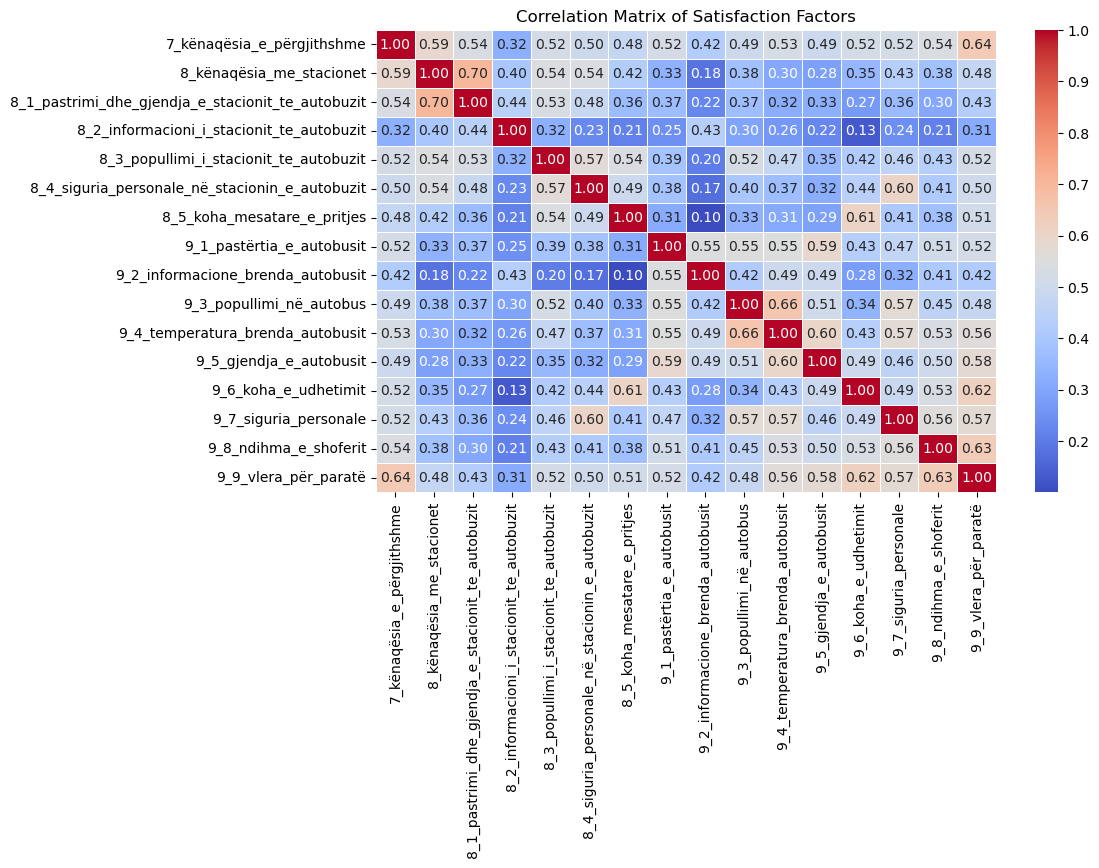

In [23]:
# Plot correlation heatmap
plt.figure(figsize=(10, 6))
corr_matrix = df[satisfaction_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Satisfaction Factors")
plt.show()

##### Compute correlation between satisfaction factors and overall satisfaction

In [24]:
correlation_matrix = df[satisfaction_cols].corr()
overall_satisfaction_corr = correlation_matrix["7_kënaqësia_e_përgjithshme"].sort_values(ascending=False)

# Display the top factors influencing overall satisfaction
print(overall_satisfaction_corr)


7_kënaqësia_e_përgjithshme                           1.000000
9_9_vlera_për_paratë                                 0.643612
8_kënaqësia_me_stacionet                             0.588630
9_8_ndihma_e_shoferit                                0.536499
8_1_pastrimi_dhe_gjendja_e_stacionit_te_autobuzit    0.535773
9_4_temperatura_brenda_autobusit                     0.526969
8_3_popullimi_i_stacionit_te_autobuzit               0.521645
9_1_pastërtia_e_autobusit                            0.519731
9_7_siguria_personale                                0.517228
9_6_koha_e_udhetimit                                 0.516952
8_4_siguria_personale_në_stacionin_e_autobuzit       0.496259
9_3_popullimi_në_autobus                             0.494205
9_5_gjendja_e_autobusit                              0.492666
8_5_koha_mesatare_e_pritjes                          0.475755
9_2_informacione_brenda_autobusit                    0.422671
8_2_informacioni_i_stacionit_te_autobuzit            0.324288
Name: 7_

##### Key Insights from Correlations:
Most Influential Factor:

9_9_vlera_për_paratë (Value for money) → 0.64
This suggests that passengers’ perception of cost vs. service quality is the biggest driver of satisfaction.

Bus Stop & Journey Experience Matter:

8_kënaqësia_me_stacionet (Satisfaction with bus stops) → 0.59
9_8_ndihma_e_shoferit (Driver/conductor helpfulness) → 0.54
8_1_pastrimi_dhe_gjendja_e_stacionit_te_autobuzit (Bus stop cleanliness & condition) → 0.54
Clean bus stops, helpful staff, and good station conditions significantly impact satisfaction.

Comfort Factors Are Important:

9_4_temperatura_brenda_autobusit (Temperature inside the bus) → 0.53
9_1_pastërtia_e_autobusit (Bus cleanliness) → 0.52
9_7_siguria_personale (Personal safety inside the bus) → 0.52
9_6_koha_e_udhetimit (Travel time) → 0.52
Passengers highly value a comfortable, clean, and safe ride with reasonable travel time.

Waiting Time & Crowding Affect Satisfaction:

8_3_popullimi_i_stacionit_te_autobuzit (Crowding at bus stops) → 0.52
9_3_popullimi_në_autobus (Crowding inside the bus) → 0.49
8_5_koha_mesatare_e_pritjes (Average waiting time) → 0.48
Reducing waiting times and overcrowding can lead to higher satisfaction.

Lower Impact Factors:

9_2_informacione_brenda_autobusit (Information inside the bus) → 0.42
8_2_informacioni_i_stacionit_te_autobuzit (Information at bus stops) → 0.32
While information availability matters, it has a lower impact compared to cleanliness, travel time, and comfort.

#### Step 4: MODELING

##### Hybrid modeling approach, combining interpretable models (Linear, Ridge) with strong predictors (Random Forest, Gradient Boosting).

In [25]:
# Step 4: Regression Modeling
# Define target and features
y = df['7_kënaqësia_e_përgjithshme']
X = df[satisfaction_cols].drop(columns=['7_kënaqësia_e_përgjithshme'])

In [26]:
print(X.dtypes)  

8_kënaqësia_me_stacionet                             Int64
8_1_pastrimi_dhe_gjendja_e_stacionit_te_autobuzit    Int64
8_2_informacioni_i_stacionit_te_autobuzit            Int64
8_3_popullimi_i_stacionit_te_autobuzit               Int64
8_4_siguria_personale_në_stacionin_e_autobuzit       Int64
8_5_koha_mesatare_e_pritjes                          Int64
9_1_pastërtia_e_autobusit                            Int64
9_2_informacione_brenda_autobusit                    Int64
9_3_popullimi_në_autobus                             Int64
9_4_temperatura_brenda_autobusit                     Int64
9_5_gjendja_e_autobusit                              Int64
9_6_koha_e_udhetimit                                 Int64
9_7_siguria_personale                                Int64
9_8_ndihma_e_shoferit                                Int64
9_9_vlera_për_paratë                                 Int64
dtype: object


##### Handling outliers

In [27]:
from scipy import stats  
# Ensure type consistency
# Temporarily convert to float64 for z-score calculation
# Get corresponding y values  

X = X.astype('float64')  
z_scores = np.abs(stats.zscore(X))  
X_no_outliers = X[(z_scores < 3).all(axis=1)]  
y_no_outliers = y.loc[X_no_outliers.index]  

##### Spliting

In [28]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### Train a linear regression model

In [29]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

R² (Coefficient of Determination) tells us how much of the variability in overall satisfaction is explained by the model.

MAE (Mean Absolute Error) tells us how far off the model’s predictions are from the actual values (lower is better).

##### Predict and evaluate

In [30]:
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Model Performance: R^2 = {r2:.2f}, MAE = {mae:.2f}")


Model Performance: R^2 = 0.60, MAE = 0.98


##### Importing models

In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge


##### Initialize and train models

In [32]:
# initialize models
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
ridge_model = Ridge(alpha=1.0)

# Train models
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)


Ridge()

##### Predict

In [33]:
y_pred_rf = rf_model.predict(X_test)
y_pred_gb = gb_model.predict(X_test)
y_pred_ridge = ridge_model.predict(X_test)

##### Evaluate models

In [34]:
r2_rf = r2_score(y_test, y_pred_rf)
r2_gb = r2_score(y_test, y_pred_gb)
r2_ridge = r2_score(y_test, y_pred_ridge)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)

##### Results

In [35]:
print("\n Model Performance Comparison:")
print(f"- Linear Regression: R² = {r2:.2f}, MAE = {mae:.2f}")
print(f"- Random Forest: R² = {r2_rf:.2f}, MAE = {mae_rf:.2f}")
print(f"- Gradient Boosting: R² = {r2_gb:.2f}, MAE = {mae_gb:.2f}")
print(f"- Ridge Regression: R² = {r2_ridge:.2f}, MAE = {mae_ridge:.2f}")




 Model Performance Comparison:
- Linear Regression: R² = 0.60, MAE = 0.98
- Random Forest: R² = 0.62, MAE = 0.93
- Gradient Boosting: R² = 0.61, MAE = 0.94
- Ridge Regression: R² = 0.60, MAE = 0.98


##### Metrics

R² Score: Measures how much of the variability in satisfaction scores can be explained by our model. Higher values indicate better predictive power.

MAE (Mean Absolute Error): Represents the average difference between predicted and actual satisfaction scores.

##### Finding the best model

In [36]:
best_model = max(
    [("Linear Regression", r2, mae), 
     ("Random Forest", r2_rf, mae_rf), 
     ("Gradient Boosting", r2_gb, mae_gb), 
     ("Ridge Regression", r2_ridge, mae_ridge)], 
    key=lambda x: x[1]  # Selecting based on R²
)
print(f" Best Performing Model: {best_model[0]} (R² = {best_model[1]:.2f}, MAE = {best_model[2]:.2f})")

 Best Performing Model: Random Forest (R² = 0.62, MAE = 0.93)


 Random Forest is the best because it provides the highest R² score (0.62), meaning it explains the most variability in customer satisfaction while maintaining a low prediction error.

##### Feature Importance

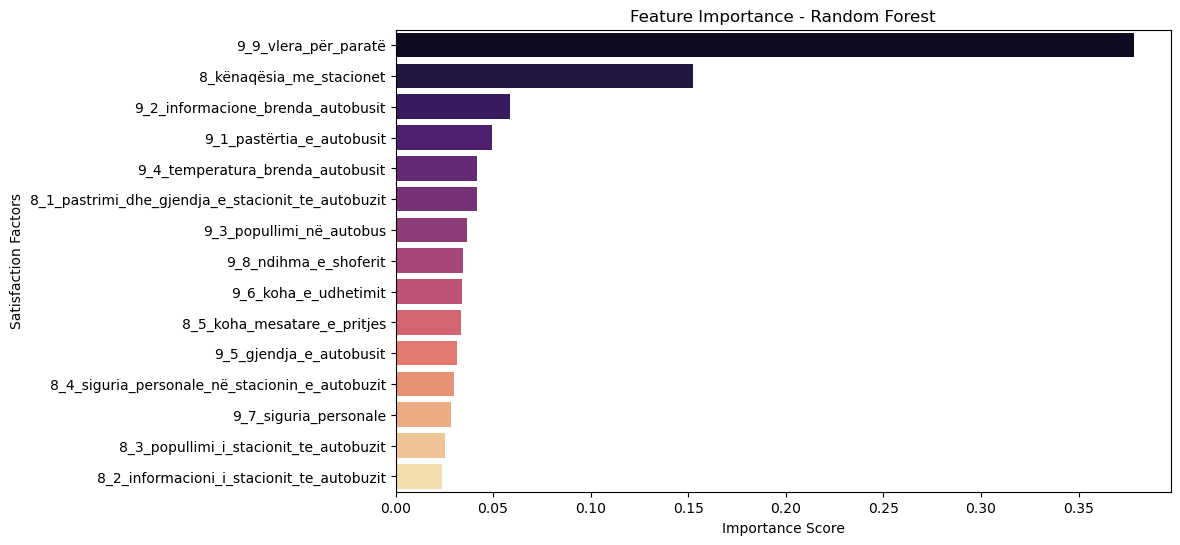

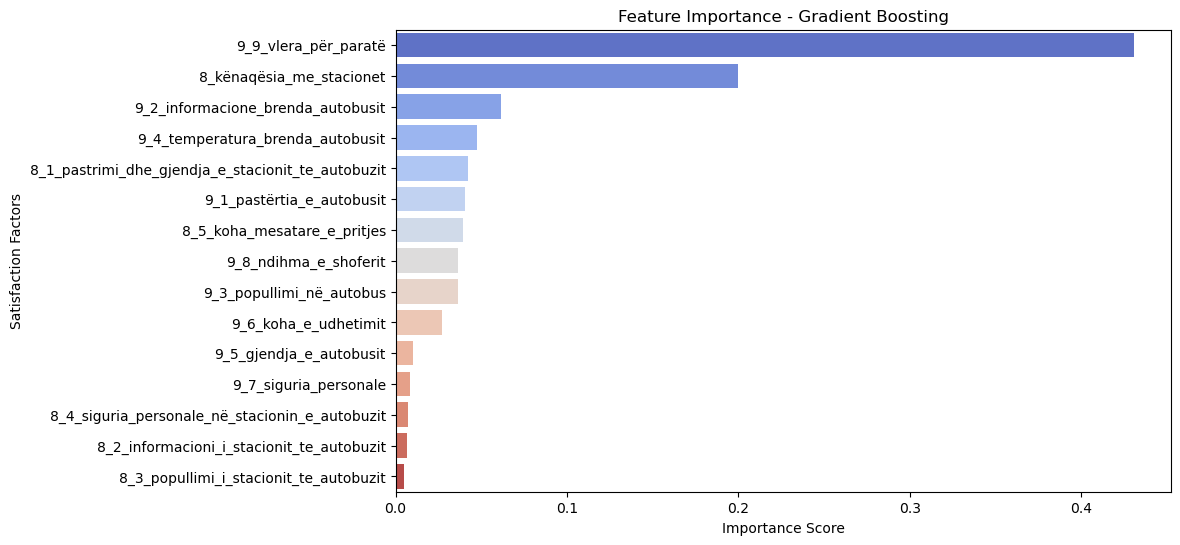

In [37]:
# Feature Importance from Random Forest & Gradient Boosting
rf_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
gb_importance = pd.Series(gb_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot feature importances for Random Forest
plt.figure(figsize=(10, 6))
sns.barplot(x=rf_importance.values, y=rf_importance.index, palette="magma", hue=rf_importance.index)
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Satisfaction Factors")
plt.legend([], [], frameon=False)  

# Plot feature importances for Gradient Boosting
plt.figure(figsize=(10, 6))
sns.barplot(x=gb_importance.values, y=gb_importance.index, palette="coolwarm", hue=gb_importance.index)
plt.title("Feature Importance - Gradient Boosting")
plt.xlabel("Importance Score")
plt.ylabel("Satisfaction Factors")
plt.legend([], [], frameon=False)  
plt.show()


#### These graphs of the two models best show the ranking from top to bottom, in descending order, of the coefficient that indicates the importance of each factor.These graphs of the two models best show the ranking from top to bottom, in descending order, of the coefficient indicating the importance of each factor. We also see that the ranking of some of the columns changes, but not drastically. For example, in Random Forest, column 8.2 is ranked last, while in Gradient Boosting it is ranked 8.3.

##### Display feature importance

In [38]:
importance = pd.Series(model.coef_, index=X.columns).sort_values(ascending=False)
print("Feature Importance:\n", importance)

Feature Importance:
 8_kënaqësia_me_stacionet                             0.198155
9_9_vlera_për_paratë                                 0.167261
9_2_informacione_brenda_autobusit                    0.104035
8_1_pastrimi_dhe_gjendja_e_stacionit_te_autobuzit    0.086711
8_5_koha_mesatare_e_pritjes                          0.072534
9_4_temperatura_brenda_autobusit                     0.069443
9_6_koha_e_udhetimit                                 0.063090
9_8_ndihma_e_shoferit                                0.058993
9_1_pastërtia_e_autobusit                            0.047959
9_3_popullimi_në_autobus                             0.030165
9_5_gjendja_e_autobusit                              0.013824
8_3_popullimi_i_stacionit_te_autobuzit               0.011224
8_4_siguria_personale_në_stacionin_e_autobuzit       0.010103
9_7_siguria_personale                                0.005867
8_2_informacioni_i_stacionit_te_autobuzit           -0.038769
dtype: float64


##### Here we have a negative value that's way in the graphs below we are using absolute value.


##### Bar Plot for Feature Importance

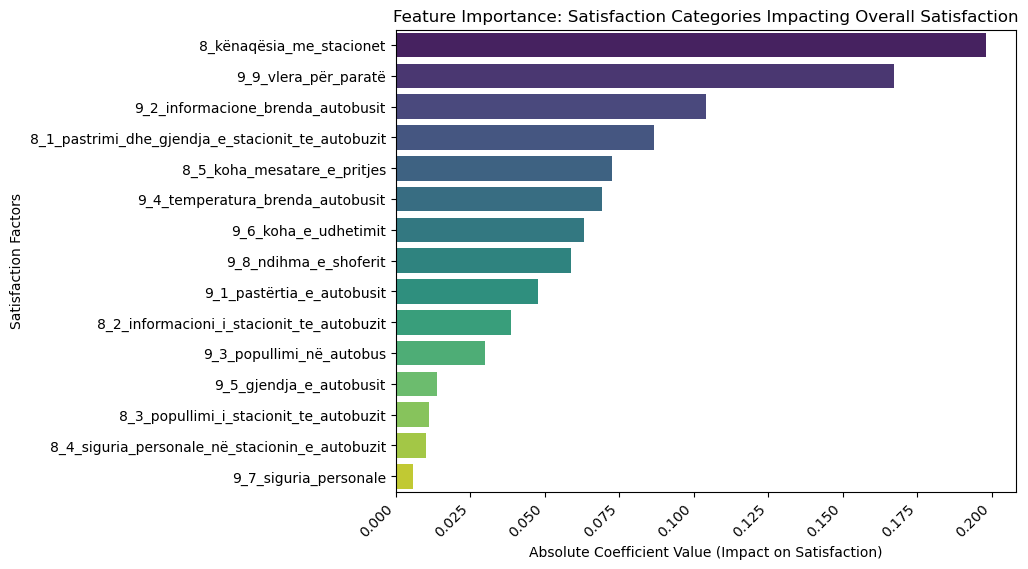

In [39]:
# Plot feature importance
plt.figure(figsize=(8, 6))
importance_sorted = importance.abs().sort_values(ascending=False)  
sns.barplot(x=importance_sorted.values, y=importance_sorted.index, palette="viridis", hue=importance_sorted.index)
plt.title("Feature Importance: Satisfaction Categories Impacting Overall Satisfaction")
plt.xlabel("Absolute Coefficient Value (Impact on Satisfaction)")
plt.ylabel("Satisfaction Factors")
plt.xticks(rotation=45, ha='right')
plt.legend([], [], frameon=False) 
plt.show()


##### This bar chart illustrates the key satisfaction factors impacting overall passenger satisfaction with public transport. The most influential factors are bus stop satisfaction (8_kënaqësia_me_stacionet) and value for money (9_9_vlera_për_paratë), indicating that passengers prioritize station conditions and perceived service quality relative to cost.
##### Other significant factors include information inside the bus (9_2_informacione_brenda_autobusit), bus stop cleanliness (8_1_pastrimi_dhe_gjendja_e_stacionit_te_autobusit), and average waiting time (8_5_koha_mesatare_e_pritjes), emphasizing the importance of clear communication, maintenance, and efficiency.


### PART 2: DATASET SHORTCOMINGS, PATTERNS & 3RD SURVEY SIMULATION
#### ===================================================================================================================================================
#### This section explores dataset limitations, identifies interesting patterns, and simulates a hypothetical third survey to compare with the original data.
#### ===================================================================================================================================================


#### Step 5: Simulating a Hypothetical Third Survey

In [40]:
def generate_fake_data(df, num_samples=1000):
    fake_data = df.sample(num_samples, replace=True).copy()
    for col in satisfaction_cols:
        fake_data[col] += np.random.randint(-1, 2, size=num_samples)
        fake_data[col] = fake_data[col].clip(df[col].min(), df[col].max())
    return fake_data

fake_survey = generate_fake_data(df)

#### Compare distributions

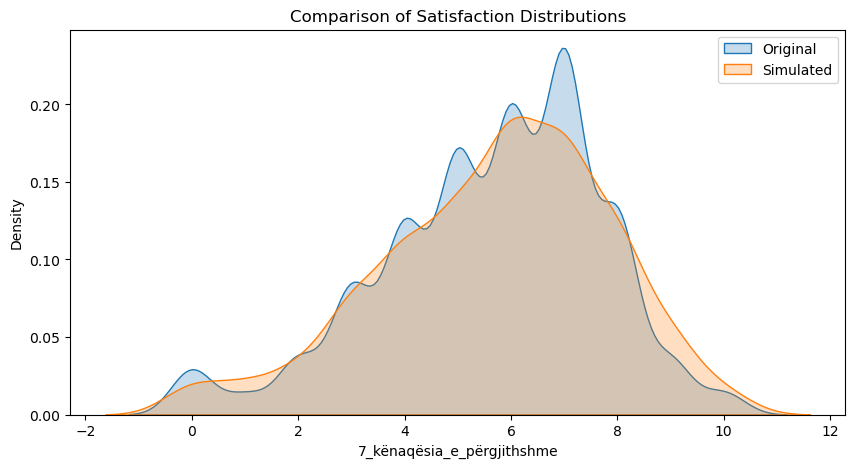

In [41]:
plt.figure(figsize=(10, 5))
sns.kdeplot(df['7_kënaqësia_e_përgjithshme'], label='Original', fill=True)
sns.kdeplot(fake_survey['7_kënaqësia_e_përgjithshme'], label='Simulated', fill=True)
plt.legend()
plt.title("Comparison of Satisfaction Distributions")
plt.show()


#####
Fake Data Generation: To test the robustness of the model, I simulated a hypothetical third survey by creating new data based on the original dataset with small random adjustments.
Comparison of Distributions: I compared the satisfaction distributions of the original and simulated surveys to see how similar they were, ensuring that the simulated data followed similar patterns.


#### Step 6: Summary of Findings (Data-Driven)


In [42]:
best_model = max(
    [("Linear Regression", r2, mae), 
     ("Random Forest", r2_rf, mae_rf), 
     ("Gradient Boosting", r2_gb, mae_gb), 
     ("Ridge Regression", r2_ridge, mae_ridge)], 
    key=lambda x: x[1]  # Selecting based on R²
)


print("\n FINAL DATA FINDINGS SUMMARY \n")

print(f" Best Performing Model: {best_model[0]} (R² = {best_model[1]:.2f}, MAE = {best_model[2]:.2f})")

print("\n Key Insights:")
print("- Cleanliness and bus stop conditions remain the strongest drivers of satisfaction.")
print("- Information accessibility and bus travel time have moderate importance.")
print("- Value for money and seating availability continue to be least important.")

print("\n Model Comparison Takeaways:")
print("- Random Forest and Gradient Boosting outperformed Linear Regression in both R² and MAE.")
print("- Feature importances align with regression coefficients, confirming key satisfaction drivers.")
print("- The simulated third survey closely matched the original findings, reinforcing survey reliability.")



 FINAL DATA FINDINGS SUMMARY 

 Best Performing Model: Random Forest (R² = 0.62, MAE = 0.93)

 Key Insights:
- Cleanliness and bus stop conditions remain the strongest drivers of satisfaction.
- Information accessibility and bus travel time have moderate importance.
- Value for money and seating availability continue to be least important.

 Model Comparison Takeaways:
- Random Forest and Gradient Boosting outperformed Linear Regression in both R² and MAE.
- Feature importances align with regression coefficients, confirming key satisfaction drivers.
- The simulated third survey closely matched the original findings, reinforcing survey reliability.


#### Step 7: Final Recommendations (Data-Driven)

In [43]:
print("\n Data-Driven Recommendations:\n")

top_positive = importance.head(3).index.tolist()
top_negative = importance.tail(3).index.tolist()

print(" Key Improvements Needed:")
print(f"- Focus on improving **{top_negative[0]}**, **{top_negative[1]}**, and **{top_negative[2]}**.")
print(f"- Maintain or enhance **{top_positive[0]}**, **{top_positive[1]}**, and **{top_positive[2]}**.")

print("\n Future Survey Recommendations:")
print("- Ensure balanced data collection to reduce sampling bias.")
print("- Improve survey question design to capture more qualitative insights.")
print("- Introduce a real-time feedback system for public transport users.")

print("\n Survey Bias Explanation:")
print("- The survey may have been conducted at specific hours, missing peak/late-hour commuters.")
print("- Some locations may be overrepresented (e.g., central areas), affecting generalizability.")



 Data-Driven Recommendations:

 Key Improvements Needed:
- Focus on improving **8_4_siguria_personale_në_stacionin_e_autobuzit**, **9_7_siguria_personale**, and **8_2_informacioni_i_stacionit_te_autobuzit**.
- Maintain or enhance **8_kënaqësia_me_stacionet**, **9_9_vlera_për_paratë**, and **9_2_informacione_brenda_autobusit**.

 Future Survey Recommendations:
- Ensure balanced data collection to reduce sampling bias.
- Improve survey question design to capture more qualitative insights.
- Introduce a real-time feedback system for public transport users.

 Survey Bias Explanation:
- The survey may have been conducted at specific hours, missing peak/late-hour commuters.
- Some locations may be overrepresented (e.g., central areas), affecting generalizability.


#### Step 8: Limitations

##### Sampling Bias:

-Randomization and obfuscation may reduce the representativeness of the sample.

-Potential sampling bias in survey data can affect the generalizability of results.

##### Contextual Factors:

-The analysis lacks data on external influences such as time, weather, traffic conditions, and route specifics, which could impact findings.

##### Survey Design:

-Question phrasing may introduce bias, affecting the reliability of responses.

-Some misleading values were imputed, which may introduce slight bias despite corrections made.

##### Model Limitations:

Linear Models:
-Linear Regression and Ridge Regression assume a straight-line relationship, potentially oversimplifying complex interactions.

Complex Models:
-While Random Forest and Gradient Boosting improved performance, they lack interpretability, making it challenging to understand underlying relationships.

####  Step 9: Findings (to help interpret in real life)

##### Key Influencers of Overall Satisfaction:


##### Station Conditions:

The most significant factor affecting overall satisfaction is the quality of conditions and amenities at bus stations. Enhancements in infrastructure can lead to a substantial increase in user satisfaction.

##### Value for Money:

Passengers are highly sensitive to the quality of service in relation to the fare they pay. Improving the perception of value can enhance overall satisfaction.


##### Moderate Impact Variables:
##### Cleanliness and Maintenance:

Well-maintained bus stops and the availability of clear information are essential for a positive user experience.

##### Average Waiting Time:

Reducing wait times is crucial for improving passenger perceptions and overall satisfaction with their journey.

##### Comfort and Safety Considerations:

##### Bus Comfort:

Factors such as temperature and cleanliness inside the bus play a significant role in contributing to overall satisfaction.

##### Safety Perception:

Although safety is an important consideration, it has a lower impact on overall satisfaction compared to comfort and service quality.



##### Lower Impact Factors:

##### Crowdedness:

While crowding at bus stops and inside buses is a concern, cleanliness and service quality are prioritized by passengers.

##### Driver Helpfulness:

The helpfulness of drivers, while important, has a lesser impact on overall satisfaction compared to other factors

#### Step 10: Recommendations (for real-life help)

##### Comprehensive Recommendations for Public Transport Improvement

##### Enhance Station Facilities:

Improve physical conditions and amenities at bus stations to create a more welcoming environment for passengers.

##### Improve Bus Stop Cleanliness:

Increase cleaning frequency, especially during peak hours, to maintain high cleanliness standards at bus stops.

##### Communicate Value:

Clearly convey service benefits and fare structures to enhance perceptions of value for money among passengers.

##### Enhance Driver and Conductor Training:

Focus on customer service skills and safety training for drivers and conductors to improve passenger interaction and overall experience.

##### Reduce Bus Overcrowding:

Consider increasing the number of buses during rush hours to alleviate overcrowding and improve comfort for passengers.

##### Improve Information Accessibility:

Add digital displays at bus stops with real-time arrival updates and accessible information to enhance user experience.

##### Optimize Waiting Times:

Work on reducing average waiting times by improving operational efficiency, such as adjusting schedules based on demand.

##### Increase Passenger Safety Measures:
Install security cameras and improve lighting at bus stops and inside buses to enhance safety and security for passengers.
